# Data Load

In [1]:
import pandas as pd
RawData = pd.read_csv("FundingProject.csv")
RawData.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00


In [2]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 15 columns):
ID                  110815 non-null int64
name                110814 non-null object
category            110815 non-null object
main_category       110815 non-null object
currency            110815 non-null object
deadline            110815 non-null object
goal                110815 non-null int64
launched            110815 non-null object
pledged             110815 non-null float64
state               110815 non-null object
backers             110815 non-null int64
country             110815 non-null object
usd pledged         109999 non-null float64
usd_pledged_real    110815 non-null float64
usd_goal_real       110815 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 12.7+ MB


# Process Data

In [3]:
import pandas as pd
ProcessedData = pd.DataFrame()

### Project status 

In [4]:
RawData["state"].describe()

count     110815
unique         6
top       failed
freq       58155
Name: state, dtype: object

In [5]:
RawData["state"].value_counts()

failed        58155
successful    38172
canceled      13178
suspended       707
undefined       596
live              7
Name: state, dtype: int64

In [6]:
ProcessedData["Status"] = (RawData["pledged"] > RawData["goal"]).astype("uint8")

In [7]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 1 columns):
Status    110815 non-null uint8
dtypes: uint8(1)
memory usage: 108.3 KB


In [8]:
ProcessedData["Status"].value_counts()

0    72983
1    37832
Name: Status, dtype: int64

### Year, Month, Day, Day of Week

In [9]:
from datetime import datetime

In [10]:
LaunchDates = RawData["launched"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [11]:
EndDates = RawData["deadline"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

In [12]:
ProcessedData["YearLaunched"] = LaunchDates.apply(lambda x: x.year).astype("uint16")
ProcessedData["YearLaunched"] = ProcessedData["YearLaunched"] - ProcessedData["YearLaunched"].min() + 1

In [13]:
ProcessedData["YearLaunched"].describe()

count    110815.000000
mean          2.401327
std           0.568251
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: YearLaunched, dtype: float64

In [14]:
ProcessedData["MonthLaunched"] = LaunchDates.apply(lambda x: x.month).astype("uint8")

In [15]:
ProcessedData["DayLaunched"] = LaunchDates.apply(lambda x: x.day).astype("uint8")

In [16]:
ProcessedData["DayOfWeekLaunched"] = LaunchDates.apply(lambda x: x.weekday()).replace(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]).astype("category")

In [17]:
ProcessedData["DayOfWeekLaunched"].value_counts()

Tue    23704
Wed    19257
Mon    18988
Thu    16789
Fri    15839
Sat     9222
Sun     7016
Name: DayOfWeekLaunched, dtype: int64

In [18]:
LaunchDates.head()

0   2015-12-07 18:21:00
1   2015-12-11 10:52:00
2   2015-11-09 20:12:00
3   2015-11-24 02:08:00
4   2015-11-17 12:30:00
Name: launched, dtype: datetime64[ns]

In [19]:
ProcessedData.head()

,Status,YearLaunched,MonthLaunched,DayLaunched,DayOfWeekLaunched
0,0,1,12,7,Mon
1,1,1,12,11,Fri
2,1,1,11,9,Mon
3,0,1,11,24,Tue
4,0,1,11,17,Tue


### Campaign length (time)

In [20]:
from datetime import datetime
ProcessedData["Duration(Days)"] = (EndDates - LaunchDates).apply(lambda x: x.days + 1).astype("uint8")

In [21]:
ProcessedData["Duration(Days)"].describe()

count    110815.000000
mean         33.157849
std          11.640541
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          90.000000
Name: Duration(Days), dtype: float64

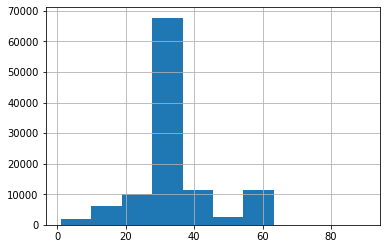

In [22]:
ProcessedData["Duration(Days)"].hist()

### Category and type

In [23]:
ProcessedData["Category"] = RawData["main_category"].astype("category")

In [24]:
#ProcessedData["Subcategory"] = RawData["category"].astype("category")

In [25]:
#ProcessedData["OverallCategory"] = (RawData["main_category"] + RawData["category"]).astype("category")

### Funding Goal
Use USD for consistency

In [26]:
RawData["usd_goal_real"].describe()

count    1.108150e+05
mean     5.388820e+04
std      1.271062e+06
min      4.900000e-01
25%      2.000000e+03
50%      6.214070e+03
75%      2.000000e+04
max      1.073699e+08
Name: usd_goal_real, dtype: float64

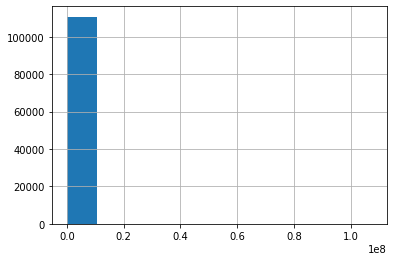

In [27]:
RawData["usd_goal_real"].hist()

In [28]:
import numpy as np
ProcessedData["log(FundingGoal)"] = RawData["usd_goal_real"].apply(np.log)

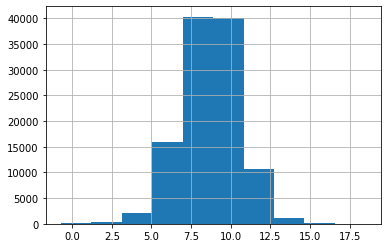

In [29]:
ProcessedData["log(FundingGoal)"].hist()

### Countries

In [30]:
RawData["country"].value_counts()

US      71905
GB      11991
CA       5555
AU       3181
DE       2865
IT       2195
FR       2084
ES       1741
MX       1633
NL       1124
SE        982
N,0"      816
CH        611
NZ        607
DK        597
HK        577
SG        523
IE        466
BE        465
AT        443
NO        378
LU         47
JP         29
Name: country, dtype: int64

In [31]:
#ProcessedData["Country"] = RawData["country"].replace("N,0\"", "NO").map(pd.read_csv("CountryCodes.csv").set_index("Code")["Name"].to_dict()).astype("category")

In [32]:
#ProcessedData["Country"].value_counts()

In [33]:
# This kinda begs the question because the pledged amount determines success
#ProcessedData["FundingRate(USD/Day)"] = RawData["usd_pledged_real"] / ProcessedData["Duration(Days)"]

# Drop extra data

In [34]:
ProcessedData["Name"] = RawData["name"].fillna("")  # Save for later

In [35]:
# Save State to ensure alignment with other tables
ProcessedData["State"] = RawData["state"]
ProcessedData = ProcessedData.loc[ProcessedData["State"].isin(["successful", "failed"]), :].reset_index()
ProcessedData.head()

,index,Status,YearLaunched,MonthLaunched,DayLaunched,DayOfWeekLaunched,Duration(Days),Category,log(FundingGoal),Name,State
0,0,0,1,12,7,Mon,25,Fashion,8.355500,Organic Tattoo remains 10 days (Self use & cus...,failed
1,1,1,1,12,11,Fri,21,Fashion,7.683491,Handcrafted leather wallet | key holder | card...,successful
2,2,1,1,11,9,Mon,53,Music,8.517193,The Liaisons: a new twist on the old standards,successful
3,3,0,1,11,24,Tue,38,Publishing,9.903488,The Many Encounters of Bosley Bear,failed
4,4,0,1,11,17,Tue,45,Fashion,10.973337,Swift & Co | Innovative Men's Footwear,failed


In [36]:
def ShowCorrelationHeatmap(DataFrame, FigureSize = (10, 10)):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    
    plt.close()
    axes = plt.figure(figsize = FigureSize).add_subplot(111)
    sns.heatmap(pd.DataFrame(DataFrame.corr(method = "spearman")["Status"]).T, annot = True)

    # Fix for cutoff top and bottom (Apparently bug with matplotlib version 3.1.1)
    bottom, top = plt.ylim()
    plt.ylim(bottom + 0.5, top - 0.5)

    plt.show()

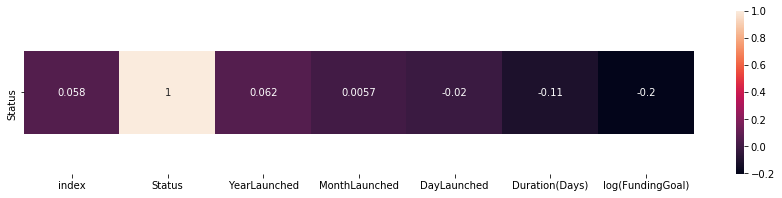

In [37]:
ShowCorrelationHeatmap(ProcessedData, FigureSize = (15, 3))

In [38]:
#ProcessedData.drop(["Subcategory", "OverallCategory", "Country"], axis = 1, inplace = True)

# Modeling

In [39]:
ProcessedData.dropna(inplace = True)

In [40]:
ProcessedData["Status"].value_counts()

0    59133
1    37194
Name: Status, dtype: int64

In [41]:
# Show dupes and null counts per column
for column in ProcessedData.columns.to_list():
    print(column, ":", ProcessedData[column].duplicated(keep = False).sum(), " - " , ProcessedData[column].isnull().sum())

index : 0  -  0
Status : 96327  -  0
YearLaunched : 96327  -  0
MonthLaunched : 96327  -  0
DayLaunched : 96327  -  0
DayOfWeekLaunched : 96327  -  0
Duration(Days) : 96325  -  0
Category : 96327  -  0
log(FundingGoal) : 81443  -  0
Name : 353  -  0
State : 96327  -  0


In [42]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96327 entries, 0 to 96326
Data columns (total 11 columns):
index                96327 non-null int64
Status               96327 non-null uint8
YearLaunched         96327 non-null uint16
MonthLaunched        96327 non-null uint8
DayLaunched          96327 non-null uint8
DayOfWeekLaunched    96327 non-null category
Duration(Days)       96327 non-null uint8
Category             96327 non-null category
log(FundingGoal)     96327 non-null float64
Name                 96327 non-null object
State                96327 non-null object
dtypes: category(2), float64(1), int64(1), object(2), uint16(1), uint8(4)
memory usage: 4.4+ MB


## Generate baseline model without using title field

In [43]:
TrainingData = pd.get_dummies(ProcessedData.drop(["Name", "State"], axis = 1), drop_first = True)

In [44]:
TrainingData.head(3)

,index,Status,YearLaunched,MonthLaunched,DayLaunched,Duration(Days),log(FundingGoal),DayOfWeekLaunched_Mon,DayOfWeekLaunched_Sat,DayOfWeekLaunched_Sun,...,Category_Fashion,Category_Film & Video,Category_Food,Category_Games,Category_Journalism,Category_Music,Category_Photography,Category_Publishing,Category_Technology,Category_Theater
0,0,0,1,12,7,25,8.355500,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,12,11,21,7.683491,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1,1,11,9,53,8.517193,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96327 entries, 0 to 96326
Data columns (total 27 columns):
index                    96327 non-null int64
Status                   96327 non-null uint8
YearLaunched             96327 non-null uint16
MonthLaunched            96327 non-null uint8
DayLaunched              96327 non-null uint8
Duration(Days)           96327 non-null uint8
log(FundingGoal)         96327 non-null float64
DayOfWeekLaunched_Mon    96327 non-null uint8
DayOfWeekLaunched_Sat    96327 non-null uint8
DayOfWeekLaunched_Sun    96327 non-null uint8
DayOfWeekLaunched_Thu    96327 non-null uint8
DayOfWeekLaunched_Tue    96327 non-null uint8
DayOfWeekLaunched_Wed    96327 non-null uint8
Category_Comics          96327 non-null uint8
Category_Crafts          96327 non-null uint8
Category_Dance           96327 non-null uint8
Category_Design          96327 non-null uint8
Category_Fashion         96327 non-null uint8
Category_Film & Video    96327 non-null uint8
Category_Food 

In [46]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

def AssessClassifierModel(TrainingDataColumns, TrainingDataResults, TestingDataColumns, TestingDataResults, ModelObject):

    startTime = datetime.now()
    print("Starting " + str(type(ModelObject).__name__) + " at " + str(startTime))

    ModelObject.fit(TrainingDataColumns, TrainingDataResults)
    predictions = ModelObject.predict(TestingDataColumns)

    endTime = datetime.now()
    positiveValue = TestingDataResults.max()

    results = pd.DataFrame().append({
        "Name" : type(ModelObject).__name__,
        "F1": f1_score(TestingDataResults, predictions, pos_label = positiveValue),
        "Accuracy": accuracy_score(TestingDataResults, predictions),
        "Precision": precision_score(TestingDataResults, predictions, pos_label = positiveValue),
        "Recall" : recall_score(TestingDataResults, predictions, pos_label = positiveValue),
        "RunTime" : str(endTime - startTime),
        "ConfusionMatrix" : confusion_matrix(TestingDataResults, predictions),
        "ModelObject": ModelObject,
    }, ignore_index = True)
    
    return results

def AssessClassifierModelPerformance(TrainTestData, TargetColumnName, ModelObject_List):
    train_X, test_X, train_Y, test_Y = train_test_split(TrainTestData.drop(TargetColumnName, axis = 1), TrainTestData[TargetColumnName], test_size = 0.2)
    results_list = pd.DataFrame()
    
    for model in ModelObject_List:
        results_list = results_list.append(AssessClassifierModel(train_X, train_Y, test_X, test_Y, model), ignore_index = True)
    
    trialsPerformanceData = pd.DataFrame()

    stats_List = ["mean", "median", "min", "max"]
    for stat in stats_List:
        dataRow = pd.Series(results_list[["Accuracy", "Precision", "Recall", "F1"]].apply(getattr(pd.DataFrame, stat)), name = stat)
        trialsPerformanceData = trialsPerformanceData.append(dataRow, ignore_index = True)

    trialsPerformanceData.set_index([stats_List], inplace = True)

    return results_list, trialsPerformanceData

In [47]:
ClassifierResults_List, ClassifierPerformanceData = AssessClassifierModelPerformance(TrainingData, "Status", [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "reg:squarederror", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
])

Starting GaussianNB at 2020-02-08 10:32:45.764098
Starting BernoulliNB at 2020-02-08 10:32:45.858068
Starting RandomForestClassifier at 2020-02-08 10:32:45.938041
Starting DecisionTreeClassifier at 2020-02-08 10:32:55.544969
Starting ExtraTreesClassifier at 2020-02-08 10:32:56.100790
Starting GradientBoostingClassifier at 2020-02-08 10:33:05.310844
Starting XGBClassifier at 2020-02-08 10:33:13.633182


In [48]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierResults_List.drop("ModelObject", axis = 1))

,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.632773,"[[9785, 2104], [4971, 2406]]",0.404812,GaussianNB,0.533481,0.326149,0:00:00.063979
1,0.636769,"[[10513, 1376], [5622, 1755]]",0.334031,BernoulliNB,0.560524,0.237902,0:00:00.046984
2,0.652497,"[[9157, 2732], [3963, 3414]]",0.504918,RandomForestClassifier,0.555483,0.462790,0:00:09.575937
3,0.593636,"[[7929, 3960], [3869, 3508]]",0.472617,DecisionTreeClassifier,0.469738,0.475532,0:00:00.524831
4,0.630178,"[[8811, 3078], [4047, 3330]]",0.483134,ExtraTreesClassifier,0.519663,0.451403,0:00:09.176065
5,0.676996,"[[10187, 1702], [4521, 2856]]",0.478592,GradientBoostingClassifier,0.626591,0.387149,0:00:08.290347
6,0.665369,"[[9442, 2447], [4000, 3377]]",0.511628,XGBClassifier,0.579842,0.457774,0:00:02.589171


In [49]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierPerformanceData)

,Accuracy,F1,Precision,Recall
mean,0.641174,0.455676,0.549332,0.399814
median,0.636769,0.478592,0.555483,0.451403
min,0.593636,0.334031,0.469738,0.237902
max,0.676996,0.511628,0.626591,0.475532


In [50]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 80):
    display(pd.DataFrame(data = {
        "Names" : TrainingData.drop("Status", axis = 1).columns.to_list(),
        "Weight": (ClassifierResults_List.loc[ClassifierResults_List["Name"] == "XGBClassifier", "ModelObject"]).iloc[0].feature_importances_,
    }).sort_values(by="Weight", ascending = False).head(20))

,Names,Weight
12,Category_Comics,0.138326
20,Category_Journalism,0.075029
13,Category_Crafts,0.057835
19,Category_Games,0.056749
4,Duration(Days),0.051809
25,Category_Theater,0.051152
24,Category_Technology,0.049996
16,Category_Fashion,0.047969
14,Category_Dance,0.046809
15,Category_Design,0.046065


## Generate model using title field

In [51]:
ProcessedData["Name"]

0        Organic Tattoo remains 10 days (Self use & cus...
1        Handcrafted leather wallet | key holder | card...
2          The Liaisons:  a new twist on the old standards
3                       The Many Encounters of Bosley Bear
4                   Swift & Co | Innovative Men's Footwear
                               ...                        
96322                     Growing Pains Student Short Film
96323    Squinch Magazine: An Art Publication for Colle...
96324    Project ChArma presents Full Circle at Dance P...
96325                              Haboob Wind - The Movie
96326    LOL Mugs with daily laugh and inspirational me...
Name: Name, Length: 96327, dtype: object

In [52]:
NameData = pd.DataFrame()

### Tokenize words in title

In [53]:
def GetWords_List(TextString):
    import re
    wordCheck = re.compile(r"[^a-zA-Z0-9]+")
    return [word for word in wordCheck.split(TextString) if (len(word) > 1)]

In [54]:
import re
wordCheck = re.compile(r"[^a-zA-Z0-9]+")
NameData["Name_WordList"] = ProcessedData["Name"].apply(GetWords_List)

In [55]:
NameData["Name_WordList"].head()

0    [Organic, Tattoo, remains, 10, days, Self, use...
1    [Handcrafted, leather, wallet, key, holder, ca...
2    [The, Liaisons, new, twist, on, the, old, stan...
3            [The, Many, Encounters, of, Bosley, Bear]
4               [Swift, Co, Innovative, Men, Footwear]
Name: Name_WordList, dtype: object

### Calculate readability / complexity / length of text
How likely title is glossed over

Flesch Kincaid?

In [56]:
#!pip install textstat
from textstat import flesch_reading_ease as GetReadabilityScore

In [57]:
NameData["Name_WordCount"] = NameData["Name_WordList"].apply(len).astype("uint8")

In [58]:
NameData["Name_WordCount"].describe()

count    96327.000000
mean         5.246245
std          2.476242
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         14.000000
Name: Name_WordCount, dtype: float64

In [59]:
NameData["Name_Readability"] = ProcessedData["Name"].apply(GetReadabilityScore)

In [60]:
with pd.option_context("display.max_colwidth", 100):
    display(ProcessedData[(ProcessedData["Name"].apply(GetReadabilityScore) < -500)]["Name"])
    display(NameData[NameData["Name_Readability"] < -500]["Name_WordList"])

4593     CHALKUP,handchalk,workoutchalk,gym,fitnessgear,bodybuilding
14001                                        PoliticalRevolution.net
16060                                       #DigitalRealistStoryMode
75738                 OverTymeMusicRadio/FutureCommunicationsNetwork
80805                            D.A.H.A(demon.angel.hybrid.academy)
91747                      Mobile.Survival.Horror.Game.by.NaticaTech
Name: Name, dtype: object

4593     [CHALKUP, handchalk, workoutchalk, gym, fitnessgear, bodybuilding]
14001                                            [PoliticalRevolution, net]
16060                                             [DigitalRealistStoryMode]
75738                     [OverTymeMusicRadio, FutureCommunicationsNetwork]
80805                                       [demon, angel, hybrid, academy]
91747                      [Mobile, Survival, Horror, Game, by, NaticaTech]
Name: Name_WordList, dtype: object

In [61]:
NameData["Name_Readability"] = NameData["Name_Readability"] / NameData["Name_Readability"].max()

In [62]:
NameData["Name_Readability"].describe()

count    96327.000000
mean         0.481710
std          0.359008
min         -8.072843
25%          0.293763
50%          0.522686
75%          0.723643
max          1.000000
Name: Name_Readability, dtype: float64

### Calculate sentiment of each title
How positive or optimistic titles feel

In [63]:
from textblob import TextBlob
NameData["Name_SentimentValue"] = ProcessedData["Name"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [64]:
NameData["Name_SentimentValue"].describe()

count    96327.000000
mean         0.046105
std          0.207238
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Name_SentimentValue, dtype: float64

### Calculate average TD-IDF of words in each title
How often are similar campaigns started.
Basically reader fatigue.

In [65]:
def FilterForKeyWords(TextString):
    import nltk
    import re
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus.reader import wordnet
    from nltk.util import ngrams

    LemmatizerEngine = WordNetLemmatizer()
    removeWords_List = list(set([
        # Prepositions
        "of", "with", "without", "at", "from", "into", "during", "including", "until", "against", "through", "throughput",
        "towards", "to", "upon", "concerning", "in", "out", "for", "on", "below", "by", "over", "under", "despite",
        "before", "after", "between", "since", "among", "along", "following", "across", "behind", "beyond", "except",
        "but", "up", "down", "aboard", "amid", "as", "behind", "considering", "during", "inside", "minus", "off", "per",
        "versus", "via",
        
        # Verbs
        "be", "are", "is", "was",
    ]))

    alphaCheck = re.compile(r"^[a-z]+$")

    POSTagToLemmaTag_Dict = {
        "J" : wordnet.ADJ,
        "N" : wordnet.NOUN,
        "V" : wordnet.VERB,
        "R" : wordnet.ADV,
    }

    return str([LemmatizerEngine.lemmatize(word, POSTagToLemmaTag_Dict[pos[0]]) 
                for (word, pos) in nltk.pos_tag(nltk.word_tokenize(TextString.lower()))
                if (
                    (len(word) > 2) # 
                    & (alphaCheck.match(word) != None)
                    & (word not in removeWords_List)
                    & (pos[0] in [
                        "J",#"JJ", "JJR", "JJS", # Adjectives
                        "N",#"NN", "NNS", "NNP", "NNPS", # Nouns
                        "R",#"RB", "RBR", "RBS", # Adverbs
                        "V",#"VB", "VBD", "VBG", "VBN", "VBP", "VBZ", #Verbs
                        ])
                   )
               ])

def GetPrincipalWordCounts(DataFrame, TextColumnName):
    from sklearn.feature_extraction.text import CountVectorizer
    from datetime import datetime # For debugging performance data

    Vectorizer = CountVectorizer(lowercase = False,
                                 # preprocessor = FilterForKeyWords,
                                 min_df = 0.005,
                                 ngram_range = (1, 3),
                                )
    startTime = datetime.now() # For debugging performance data

    # Filter out unwanted words in each row, then create count columns for remaining words 
    WordCounts = pd.DataFrame(
        Vectorizer.fit_transform(DataFrame[TextColumnName]).toarray(), 
        columns=Vectorizer.get_feature_names(), 
        #dtype = "uint8",
    )

    return WordCounts

def GetTFIDF(Sentences_List):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(lowercase = False,
                                 # preprocessor = FilterForKeyWords,
                                 min_df = 0.005,
                                 ngram_range = (1, 3),
                                )
    return pd.DataFrame(data = vectorizer.fit_transform(Sentences_List).toarray(),
                        columns = vectorizer.get_feature_names()
                       )

In [66]:
Name_KeywordFiltered = ProcessedData["Name"].apply(lambda x: str(FilterForKeyWords(x)))

In [67]:
Name_WordCountsData = GetPrincipalWordCounts(pd.DataFrame(Name_KeywordFiltered), "Name").add_prefix("Count(").add_suffix(")")
display(Name_WordCountsData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96327 entries, 0 to 96326
Data columns (total 65 columns):
Count(adventure)      96327 non-null int64
Count(album)          96327 non-null int64
Count(app)            96327 non-null int64
Count(art)            96327 non-null int64
Count(bag)            96327 non-null int64
Count(best)           96327 non-null int64
Count(board)          96327 non-null int64
Count(book)           96327 non-null int64
Count(card)           96327 non-null int64
Count(card game)      96327 non-null int64
Count(child)          96327 non-null int64
Count(clothing)       96327 non-null int64
Count(coffee)         96327 non-null int64
Count(collection)     96327 non-null int64
Count(comic)          96327 non-null int64
Count(day)            96327 non-null int64
Count(debut)          96327 non-null int64
Count(debut album)    96327 non-null int64
Count(design)         96327 non-null int64
Count(documentary)    96327 non-null int64
Count(dream)          96327 non

None

In [68]:
Name_WordCountsData.describe()

,Count(adventure),Count(album),Count(app),Count(art),Count(bag),Count(best),Count(board),Count(book),Count(card),Count(card game),...,Count(story),Count(studio),Count(system),Count(time),Count(travel),Count(ultimate),Count(video),Count(war),Count(watch),Count(world)
count,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,...,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000
mean,0.008596,0.026638,0.010983,0.023181,0.005523,0.005367,0.005710,0.031808,0.018925,0.006405,...,0.009987,0.008212,0.005710,0.006333,0.005409,0.005087,0.008575,0.005170,0.009063,0.021863
std,0.092539,0.161411,0.104722,0.154833,0.077801,0.073912,0.076169,0.178133,0.139722,0.079777,...,0.100679,0.091047,0.075896,0.081520,0.075576,0.071432,0.092877,0.073291,0.101843,0.147157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [69]:
Name_WordCountsData.sum().sort_values(ascending = False)

Count(game)           3170
Count(book)           3064
Count(new)            2755
Count(album)          2566
Count(film)           2236
                      ... 
Count(war)             498
Count(rpg)             496
Count(clothing)        490
Count(ultimate)        490
Count(debut album)     482
Length: 65, dtype: int64

In [70]:
Name_TFIDF = GetTFIDF(Name_KeywordFiltered).add_prefix("TFIDF(").add_suffix(")")
display(Name_TFIDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96327 entries, 0 to 96326
Data columns (total 65 columns):
TFIDF(adventure)      96327 non-null float64
TFIDF(album)          96327 non-null float64
TFIDF(app)            96327 non-null float64
TFIDF(art)            96327 non-null float64
TFIDF(bag)            96327 non-null float64
TFIDF(best)           96327 non-null float64
TFIDF(board)          96327 non-null float64
TFIDF(book)           96327 non-null float64
TFIDF(card)           96327 non-null float64
TFIDF(card game)      96327 non-null float64
TFIDF(child)          96327 non-null float64
TFIDF(clothing)       96327 non-null float64
TFIDF(coffee)         96327 non-null float64
TFIDF(collection)     96327 non-null float64
TFIDF(comic)          96327 non-null float64
TFIDF(day)            96327 non-null float64
TFIDF(debut)          96327 non-null float64
TFIDF(debut album)    96327 non-null float64
TFIDF(design)         96327 non-null float64
TFIDF(documentary)    96327 non-null

None

In [71]:
Name_TFIDF.describe()

,TFIDF(adventure),TFIDF(album),TFIDF(app),TFIDF(art),TFIDF(bag),TFIDF(best),TFIDF(board),TFIDF(book),TFIDF(card),TFIDF(card game),...,TFIDF(story),TFIDF(studio),TFIDF(system),TFIDF(time),TFIDF(travel),TFIDF(ultimate),TFIDF(video),TFIDF(war),TFIDF(watch),TFIDF(world)
count,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.00000,96327.000000,96327.000000,96327.000000,96327.000000,...,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000
mean,0.007292,0.018956,0.009808,0.018697,0.004652,0.00444,0.004617,0.024255,0.013931,0.004116,...,0.008263,0.006678,0.005152,0.005246,0.004360,0.004533,0.006516,0.004389,0.007422,0.016913
std,0.079992,0.119877,0.094721,0.126633,0.065006,0.06196,0.062138,0.140154,0.105857,0.051479,...,0.084568,0.075230,0.069037,0.067879,0.061212,0.064384,0.071777,0.062548,0.081983,0.117264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.671319,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
Name_TFIDF.sum().sort_values(ascending = False)

TFIDF(book)           2336.411556
TFIDF(game)           2299.699017
TFIDF(new)            2074.006025
TFIDF(album)          1825.946983
TFIDF(art)            1800.983476
                         ...     
TFIDF(war)             422.731781
TFIDF(travel)          419.955036
TFIDF(fantasy)         417.051674
TFIDF(card game)       396.494595
TFIDF(debut album)     304.049848
Length: 65, dtype: float64

In [73]:
# Common words for failures
# ProcessedData[ProcessedData["Status"] == 0]

In [74]:
# Common words for successes
# ProcessedData[ProcessedData["Status"] == 1]

In [75]:
# Common words by category

## Modeling with name included

In [76]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96327 entries, 0 to 96326
Data columns (total 11 columns):
index                96327 non-null int64
Status               96327 non-null uint8
YearLaunched         96327 non-null uint16
MonthLaunched        96327 non-null uint8
DayLaunched          96327 non-null uint8
DayOfWeekLaunched    96327 non-null category
Duration(Days)       96327 non-null uint8
Category             96327 non-null category
log(FundingGoal)     96327 non-null float64
Name                 96327 non-null object
State                96327 non-null object
dtypes: category(2), float64(1), int64(1), object(2), uint16(1), uint8(4)
memory usage: 4.4+ MB


In [77]:
NameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96327 entries, 0 to 96326
Data columns (total 4 columns):
Name_WordList          96327 non-null object
Name_WordCount         96327 non-null uint8
Name_Readability       96327 non-null float64
Name_SentimentValue    96327 non-null float64
dtypes: float64(2), object(1), uint8(1)
memory usage: 3.0+ MB


In [78]:
Name_WordCountsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96327 entries, 0 to 96326
Data columns (total 65 columns):
Count(adventure)      96327 non-null int64
Count(album)          96327 non-null int64
Count(app)            96327 non-null int64
Count(art)            96327 non-null int64
Count(bag)            96327 non-null int64
Count(best)           96327 non-null int64
Count(board)          96327 non-null int64
Count(book)           96327 non-null int64
Count(card)           96327 non-null int64
Count(card game)      96327 non-null int64
Count(child)          96327 non-null int64
Count(clothing)       96327 non-null int64
Count(coffee)         96327 non-null int64
Count(collection)     96327 non-null int64
Count(comic)          96327 non-null int64
Count(day)            96327 non-null int64
Count(debut)          96327 non-null int64
Count(debut album)    96327 non-null int64
Count(design)         96327 non-null int64
Count(documentary)    96327 non-null int64
Count(dream)          96327 non

In [79]:
Name_TFIDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96327 entries, 0 to 96326
Data columns (total 65 columns):
TFIDF(adventure)      96327 non-null float64
TFIDF(album)          96327 non-null float64
TFIDF(app)            96327 non-null float64
TFIDF(art)            96327 non-null float64
TFIDF(bag)            96327 non-null float64
TFIDF(best)           96327 non-null float64
TFIDF(board)          96327 non-null float64
TFIDF(book)           96327 non-null float64
TFIDF(card)           96327 non-null float64
TFIDF(card game)      96327 non-null float64
TFIDF(child)          96327 non-null float64
TFIDF(clothing)       96327 non-null float64
TFIDF(coffee)         96327 non-null float64
TFIDF(collection)     96327 non-null float64
TFIDF(comic)          96327 non-null float64
TFIDF(day)            96327 non-null float64
TFIDF(debut)          96327 non-null float64
TFIDF(debut album)    96327 non-null float64
TFIDF(design)         96327 non-null float64
TFIDF(documentary)    96327 non-null

In [80]:
TrainingWithTitleData = pd.concat([
    ProcessedData.drop("Name", axis = 1),
    NameData.drop("Name_WordList", axis = 1),
    #Name_WordCountsData,
    Name_TFIDF,
], axis = 1).drop("index", axis = 1)

In [81]:
display(TrainingWithTitleData.isnull().sum().sort_values())

Status              0
TFIDF(new)          0
TFIDF(music)        0
TFIDF(more)         0
TFIDF(make)         0
                   ..
TFIDF(child)        0
TFIDF(card game)    0
TFIDF(card)         0
TFIDF(day)          0
TFIDF(world)        0
Length: 77, dtype: int64

In [82]:
TrainingWithTitleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96327 entries, 0 to 96326
Data columns (total 77 columns):
Status                 96327 non-null uint8
YearLaunched           96327 non-null uint16
MonthLaunched          96327 non-null uint8
DayLaunched            96327 non-null uint8
DayOfWeekLaunched      96327 non-null category
Duration(Days)         96327 non-null uint8
Category               96327 non-null category
log(FundingGoal)       96327 non-null float64
State                  96327 non-null object
Name_WordCount         96327 non-null uint8
Name_Readability       96327 non-null float64
Name_SentimentValue    96327 non-null float64
TFIDF(adventure)       96327 non-null float64
TFIDF(album)           96327 non-null float64
TFIDF(app)             96327 non-null float64
TFIDF(art)             96327 non-null float64
TFIDF(bag)             96327 non-null float64
TFIDF(best)            96327 non-null float64
TFIDF(board)           96327 non-null float64
TFIDF(book)            9632

In [83]:
TrainingWithTitleData = pd.get_dummies(TrainingWithTitleData, drop_first = True)

In [84]:
ClassifierWithTitleResults_List, ClassifierWithTitlePerformanceData = AssessClassifierModelPerformance(TrainingWithTitleData, "Status", [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "reg:squarederror", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
])

Starting GaussianNB at 2020-02-08 10:34:52.719479
Starting BernoulliNB at 2020-02-08 10:34:52.975397
Starting RandomForestClassifier at 2020-02-08 10:34:53.169335
Starting DecisionTreeClassifier at 2020-02-08 10:35:00.780899
Starting ExtraTreesClassifier at 2020-02-08 10:35:01.409699
Starting GradientBoostingClassifier at 2020-02-08 10:35:11.222559
Starting XGBClassifier at 2020-02-08 10:35:23.840522


In [85]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierWithTitleResults_List.drop("ModelObject", axis = 1))

,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.978044,"[[11610, 183], [240, 7233]]",0.971590,GaussianNB,0.975324,0.967884,0:00:00.223928
1,0.990398,"[[11608, 185], [0, 7473]]",0.987773,BernoulliNB,0.975842,1.000000,0:00:00.153951
2,0.990398,"[[11608, 185], [0, 7473]]",0.987773,RandomForestClassifier,0.975842,1.000000,0:00:07.579575
3,0.978719,"[[11618, 175], [235, 7238]]",0.972457,DecisionTreeClassifier,0.976393,0.968553,0:00:00.593811
4,0.990190,"[[11608, 185], [4, 7469]]",0.987506,ExtraTreesClassifier,0.975830,0.999465,0:00:09.781870
5,0.990242,"[[11608, 185], [3, 7470]]",0.987573,GradientBoostingClassifier,0.975833,0.999599,0:00:12.585973
6,0.989827,"[[11608, 185], [11, 7462]]",0.987037,XGBClassifier,0.975808,0.998528,0:00:02.743122


In [86]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierWithTitlePerformanceData)

,Accuracy,F1,Precision,Recall
mean,0.986831,0.983101,0.975839,0.990576
median,0.990190,0.987506,0.975833,0.999465
min,0.978044,0.971590,0.975324,0.967884
max,0.990398,0.987773,0.976393,1.000000


In [87]:
def CombineDataFrames(DataFrame_Left, Name_Left, DataFrame_Right, Name_Right):
    return pd.concat([DataFrame_Left, DataFrame_Right], axis = 1, keys = [Name_Left, Name_Right])

In [88]:
CombineDataFrames(ClassifierPerformanceData, "NoTitle", ClassifierWithTitlePerformanceData, "WithTitle")

NoTitle                               WithTitle                      \
        Accuracy        F1 Precision    Recall  Accuracy        F1 Precision   
mean    0.641174  0.455676  0.549332  0.399814  0.986831  0.983101  0.975839   
median  0.636769  0.478592  0.555483  0.451403  0.990190  0.987506  0.975833   
min     0.593636  0.334031  0.469738  0.237902  0.978044  0.971590  0.975324   
max     0.676996  0.511628  0.626591  0.475532  0.990398  0.987773  0.976393   

                  
          Recall  
mean    0.990576  
median  0.999465  
min     0.967884  
max     1.000000

In [89]:
display(ClassifierWithTitlePerformanceData.subtract(ClassifierPerformanceData))

,Accuracy,F1,Precision,Recall
mean,0.345657,0.527425,0.426507,0.590762
median,0.353421,0.508913,0.420350,0.548062
min,0.384408,0.637559,0.505586,0.729983
max,0.313402,0.476146,0.349802,0.524468


In [93]:
# Just name reading level
Classifier_NameReadbility_Results_List, Classifier_NameReadbility_PerformanceData = AssessClassifierModelPerformance(
    pd.concat([ProcessedData["Status"], NameData["Name_Readability"],], axis = 1),
    "Status", [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "reg:squarederror", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
])

with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(Classifier_NameReadbility_Results_List)
    display(Classifier_NameReadbility_PerformanceData)

Starting GaussianNB at 2020-02-08 10:51:07.670551
Starting BernoulliNB at 2020-02-08 10:51:07.713537
Starting RandomForestClassifier at 2020-02-08 10:51:07.781515


C:\Users\root\.conda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\root\.conda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Starting DecisionTreeClassifier at 2020-02-08 10:51:10.597614
Starting ExtraTreesClassifier at 2020-02-08 10:51:10.662593
Starting GradientBoostingClassifier at 2020-02-08 10:51:12.104132


C:\Users\root\.conda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Starting XGBClassifier at 2020-02-08 10:51:14.268440


,Accuracy,ConfusionMatrix,F1,ModelObject,Name,Precision,Recall,RunTime
0,0.613205,"[[11814, 0], [7452, 0]]",0.000000,"GaussianNB(priors=None, var_smoothin...",GaussianNB,0.000000,0.000000,0:00:00.005998
1,0.613205,"[[11814, 0], [7452, 0]]",0.000000,"BernoulliNB(alpha=1.0, binarize=0.0,...",BernoulliNB,0.000000,0.000000,0:00:00.010997
2,0.612789,"[[11672, 142], [7318, 134]]",0.034679,(DecisionTreeClassifier(ccp_alpha=0....,RandomForestClassifier,0.485507,0.017982,0:00:02.785109
3,0.612789,"[[11682, 132], [7328, 124]]",0.032174,DecisionTreeClassifier(ccp_alpha=0.0...,DecisionTreeClassifier,0.484375,0.016640,0:00:00.034989
4,0.612789,"[[11682, 132], [7328, 124]]",0.032174,"(ExtraTreeClassifier(ccp_alpha=0.0, ...",ExtraTreesClassifier,0.484375,0.016640,0:00:01.411549
5,0.613205,"[[11814, 0], [7452, 0]]",0.000000,([DecisionTreeRegressor(ccp_alpha=0....,GradientBoostingClassifier,0.000000,0.000000,0:00:02.134318
6,0.612893,"[[11681, 133], [7325, 127]]",0.032936,"XGBClassifier(base_score=0.5, booste...",XGBClassifier,0.488462,0.017042,0:00:00.824736


,Accuracy,F1,Precision,Recall
mean,0.612982,0.018852,0.277531,0.009758
median,0.612893,0.032174,0.484375,0.016640
min,0.612789,0.000000,0.000000,0.000000
max,0.613205,0.034679,0.488462,0.017982


In [94]:
# Just name sentiment
Classifier_NameSentiment_Results_List, Classifier_NameSentiment_PerformanceData = AssessClassifierModelPerformance(
    pd.concat([ProcessedData["Status"], NameData["Name_SentimentValue"],], axis = 1),
    "Status", [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "reg:squarederror", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
])

with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(Classifier_NameSentiment_Results_List)
    display(Classifier_NameSentiment_PerformanceData)

Starting GaussianNB at 2020-02-08 10:51:15.301109
Starting BernoulliNB at 2020-02-08 10:51:15.338098
Starting RandomForestClassifier at 2020-02-08 10:51:15.387082


C:\Users\root\.conda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Starting DecisionTreeClassifier at 2020-02-08 10:51:17.282476
Starting ExtraTreesClassifier at 2020-02-08 10:51:17.331460
Starting GradientBoostingClassifier at 2020-02-08 10:51:18.605052
Starting XGBClassifier at 2020-02-08 10:51:20.144560


,Accuracy,ConfusionMatrix,F1,ModelObject,Name,Precision,Recall,RunTime
0,0.608481,"[[11525, 307], [7236, 198]]",0.049880,"GaussianNB(priors=None, var_smoothin...",GaussianNB,0.392079,0.026634,0:00:00.004999
1,0.614139,"[[11832, 0], [7434, 0]]",0.000000,"BernoulliNB(alpha=1.0, binarize=0.0,...",BernoulliNB,0.000000,0.000000,0:00:00.010997
2,0.612997,"[[11455, 377], [7079, 355]]",0.086946,(DecisionTreeClassifier(ccp_alpha=0....,RandomForestClassifier,0.484973,0.047754,0:00:01.863404
3,0.613308,"[[11477, 355], [7095, 339]]",0.083415,DecisionTreeClassifier(ccp_alpha=0.0...,DecisionTreeClassifier,0.488473,0.045601,0:00:00.018993
4,0.613516,"[[11476, 356], [7090, 344]]",0.084583,"(ExtraTreeClassifier(ccp_alpha=0.0, ...",ExtraTreesClassifier,0.491429,0.046274,0:00:01.242602
5,0.614347,"[[11769, 63], [7367, 67]]",0.017715,([DecisionTreeRegressor(ccp_alpha=0....,GradientBoostingClassifier,0.515385,0.009013,0:00:01.506519
6,0.614139,"[[11508, 324], [7110, 324]]",0.080178,"XGBClassifier(base_score=0.5, booste...",XGBClassifier,0.500000,0.043584,0:00:00.498840


,Accuracy,F1,Precision,Recall
mean,0.612990,0.057531,0.410334,0.031266
median,0.613516,0.080178,0.488473,0.043584
min,0.608481,0.000000,0.000000,0.000000
max,0.614347,0.086946,0.515385,0.047754


In [95]:
# Just TFIDF
Classifier_TFIDF_Results_List, Classifier_TFIDF_PerformanceData = AssessClassifierModelPerformance(
    pd.concat([ProcessedData["Status"], Name_TFIDF], axis = 1),
    "Status", [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "reg:squarederror", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
])

with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(Classifier_TFIDF_Results_List)
    display(Classifier_TFIDF_PerformanceData)

Starting GaussianNB at 2020-02-08 10:51:20.937306
Starting BernoulliNB at 2020-02-08 10:51:21.098254
Starting RandomForestClassifier at 2020-02-08 10:51:21.219217
Starting DecisionTreeClassifier at 2020-02-08 10:51:39.812267
Starting ExtraTreesClassifier at 2020-02-08 10:51:41.602694
Starting GradientBoostingClassifier at 2020-02-08 10:51:57.928471
Starting XGBClassifier at 2020-02-08 10:52:06.117852


,Accuracy,ConfusionMatrix,F1,ModelObject,Name,Precision,Recall,RunTime
0,0.624676,"[[9679, 2054], [5177, 2356]]",0.394541,"GaussianNB(priors=None, var_smoothin...",GaussianNB,0.534240,0.312757,0:00:00.130958
1,0.635212,"[[10787, 946], [6082, 1451]]",0.292246,"BernoulliNB(alpha=1.0, binarize=0.0,...",BernoulliNB,0.605340,0.192619,0:00:00.079976
2,0.634849,"[[10691, 1042], [5993, 1540]]",0.304498,(DecisionTreeClassifier(ccp_alpha=0....,RandomForestClassifier,0.596437,0.204434,0:00:18.562060
3,0.633448,"[[10697, 1036], [6026, 1507]]",0.299127,DecisionTreeClassifier(ccp_alpha=0.0...,DecisionTreeClassifier,0.592607,0.200053,0:00:01.759437
4,0.634849,"[[10723, 1010], [6025, 1508]]",0.300070,"(ExtraTreeClassifier(ccp_alpha=0.0, ...",ExtraTreesClassifier,0.598888,0.200186,0:00:16.293787
5,0.633136,"[[11015, 718], [6350, 1183]]",0.250795,([DecisionTreeRegressor(ccp_alpha=0....,GradientBoostingClassifier,0.622304,0.157042,0:00:08.156391
6,0.634278,"[[10777, 956], [6090, 1443]]",0.290576,"XGBClassifier(base_score=0.5, booste...",XGBClassifier,0.601501,0.191557,0:00:01.360564


,Accuracy,F1,Precision,Recall
mean,0.632921,0.304550,0.593045,0.208378
median,0.634278,0.299127,0.598888,0.200053
min,0.624676,0.250795,0.534240,0.157042
max,0.635212,0.394541,0.622304,0.312757
